In [1]:
import pandas as pd
data = pd.read_csv('/content/Dataset.csv')


In [3]:
data.isnull().sum()
data.dtypes
data['Type'] = data['Type'].astype('category')
data['Type'] = data['Type'].cat.codes

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']] = scaler.fit_transform(data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])

In [5]:
data.describe()


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,1.19940,-9.322321e-16,-1.693934e-15,-2.330580e-16,5.424994e-16,1.051603e-16,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,0.60023,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,0.00000,-2.352278e+00,-2.901986e+00,-2.068196e+00,-3.630149e+00,-1.695984e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,1.00000,-8.523974e-01,-8.125581e-01,-6.458012e-01,-6.808401e-01,-8.633176e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,1.00000,4.753123e-02,6.365340e-02,-1.995597e-01,1.134481e-02,7.698234e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,2.00000,7.474757e-01,7.376623e-01,4.084443e-01,6.834663e-01,8.491466e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,2.00000,2.247357e+00,2.557486e+00,7.514840e+00,3.672902e+00,2.278819e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


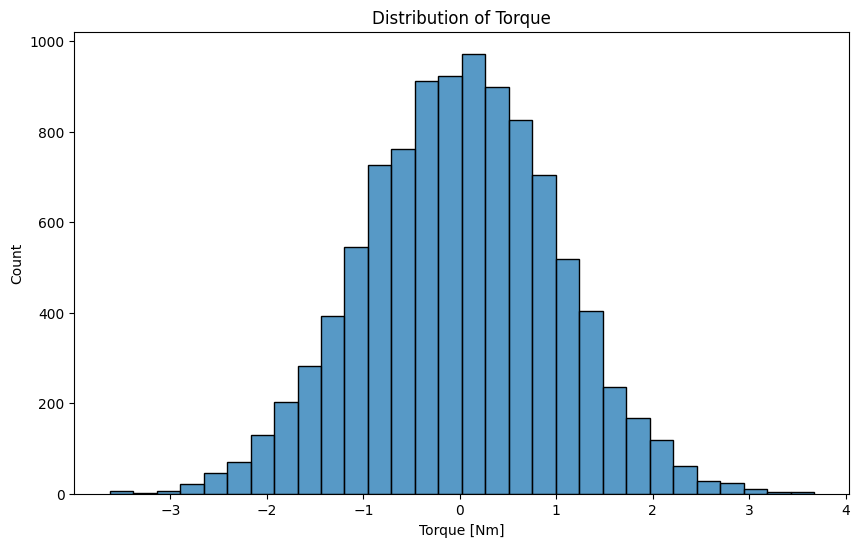

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Torque [Nm]'], bins=30)
plt.title('Distribution of Torque')
plt.show()

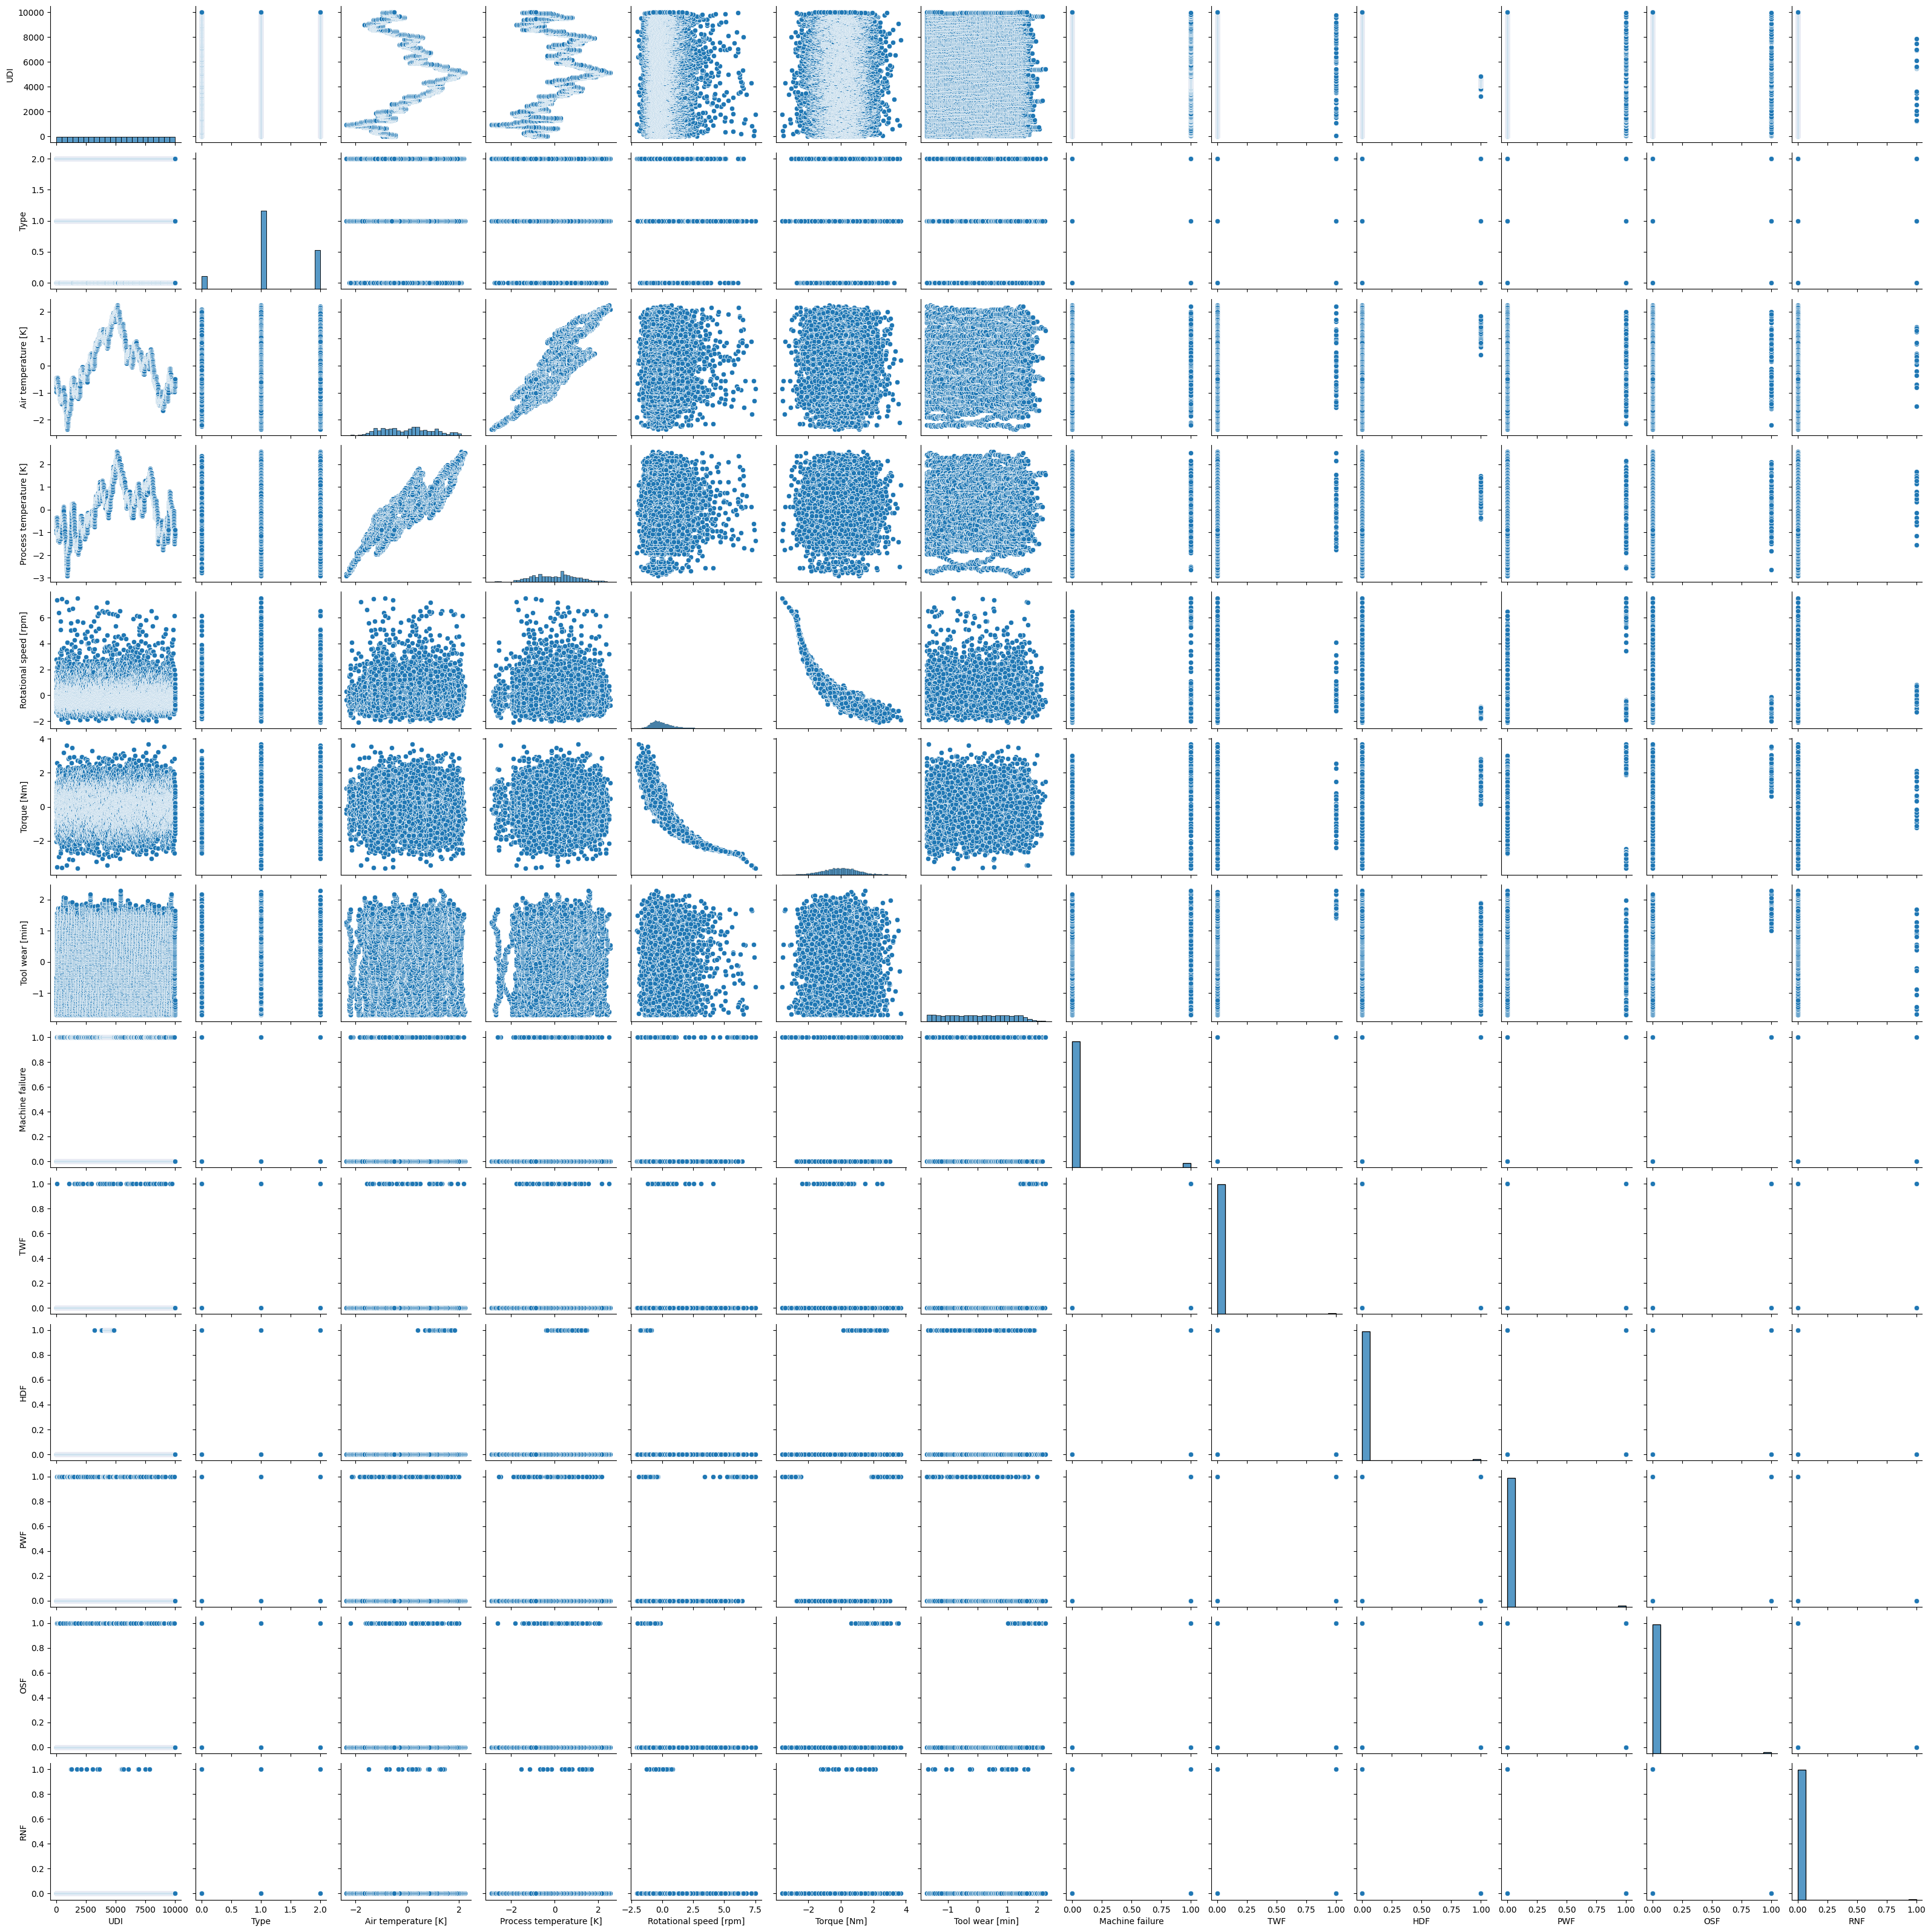

In [7]:
#Coorelation
sns.pairplot(data)
plt.show()

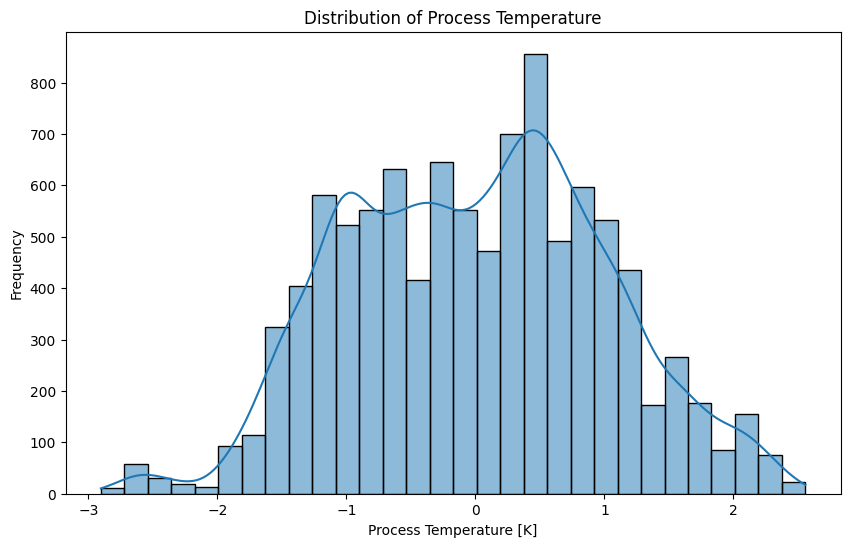

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Process temperature [K]'], kde=True, bins=30)
plt.title('Distribution of Process Temperature')
plt.xlabel('Process Temperature [K]')
plt.ylabel('Frequency')
plt.show()


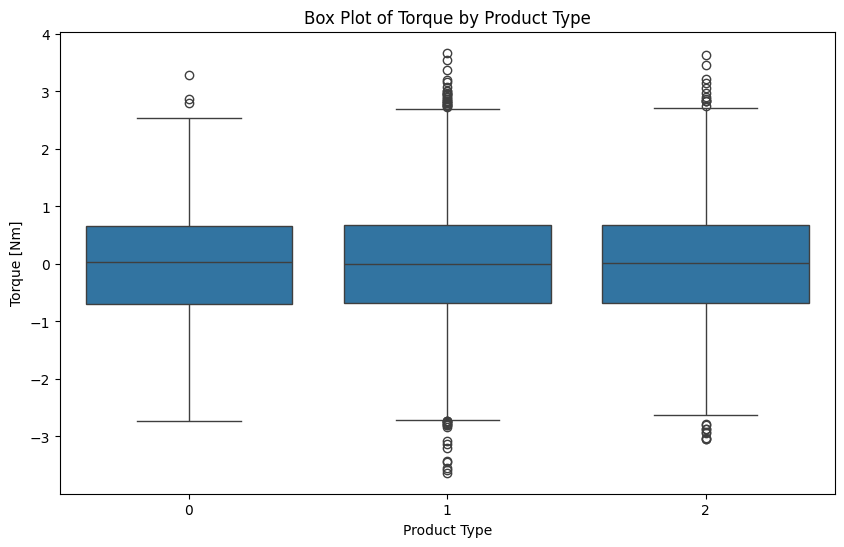

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Torque [Nm]', data=data)
plt.title('Box Plot of Torque by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Torque [Nm]')
plt.show()


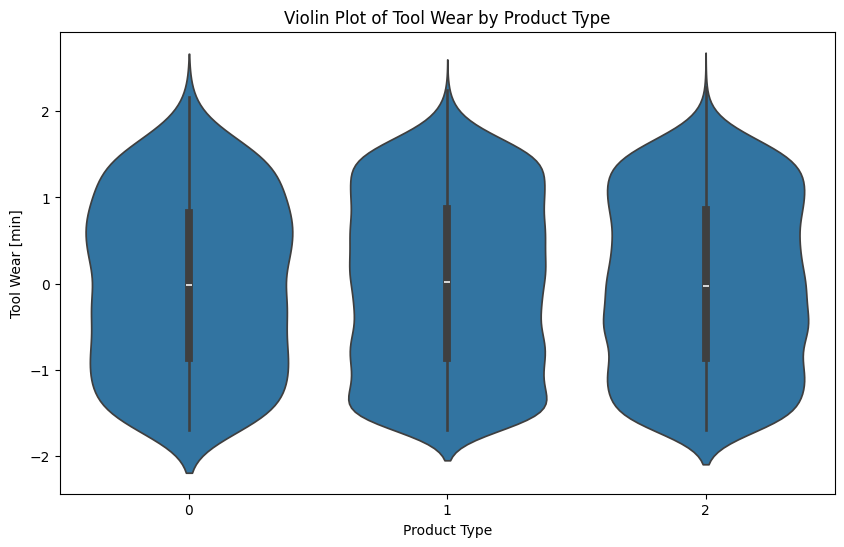

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Type', y='Tool wear [min]', data=data)
plt.title('Violin Plot of Tool Wear by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Tool Wear [min]')
plt.show()


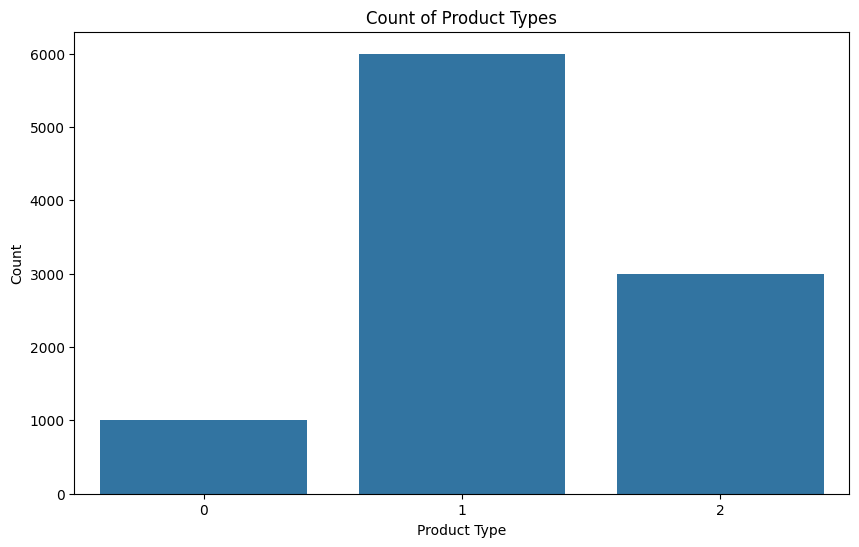

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=data)
plt.title('Count of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()


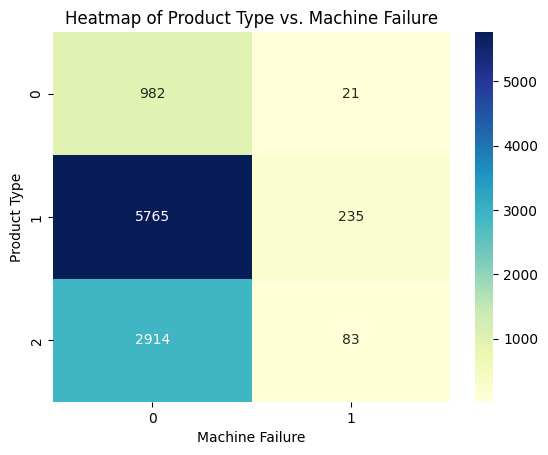

In [14]:
contingency_table = pd.crosstab(data['Type'], data['Machine failure'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Product Type vs. Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Product Type')
plt.show()



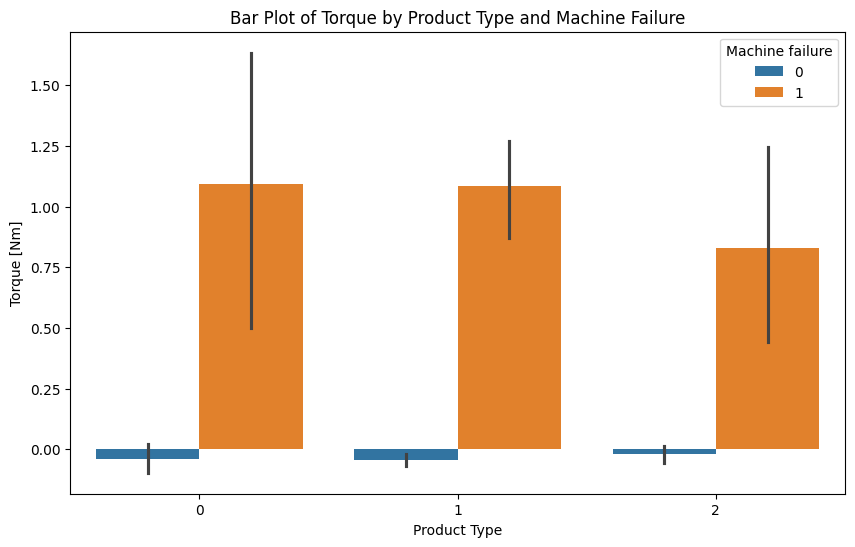

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Torque [Nm]', hue='Machine failure', data=data)
plt.title('Bar Plot of Torque by Product Type and Machine Failure')
plt.xlabel('Product Type')
plt.ylabel('Torque [Nm]')
plt.show()


In [16]:
#Further Preprocessing
missing_values = data.isnull().sum()
print(missing_values)


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [18]:
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
data.dropna(subset=[col for col in data.columns if col not in numeric_cols], inplace=True)


In [19]:
from scipy import stats
z_scores = stats.zscore(data['Torque [Nm]'])
outliers = abs(z_scores) > 3
data = data[~outliers]


In [21]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
scaler = StandardScaler()

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

<ipython-input-21-64e8a07905b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
